In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import subprocess

In [ ]:
## Function to find event files/lc files from the directory 
def find_event_files(base_directory):
    event_files = []
    
    # Regular expression to match the pattern ObsID/xti/event_cl/
    obsid_pattern = re.compile(r'^\d{10}$')
    
    # Regular expressions to match the specific filename patterns
    file_pattern = re.compile(r'^ni\d{10}_0mpu7_cl_(night|daynotconsidered)_barycorr_orbit_piexpiex_yes.evt$')

    for obsid_dir in os.listdir(base_directory):
        obsid_path = os.path.join(base_directory, obsid_dir)

        # Check if it's a directory and matches the 10-digit ObsID pattern
        if os.path.isdir(obsid_path) and obsid_pattern.match(obsid_dir):
            #print(f"Found 10-digit ObsID folder: {obsid_dir}")

            # Look for files in this directory matching the .evt pattern
            for file in os.listdir(obsid_path):
                if file_pattern.match(file):
                    full_path = os.path.join(obsid_path, file)
                    event_files.append(full_path)
                    # print(f"Found .evt file: {full_path}")

    return event_files

In [ ]:
## Write a code to extract the spin period from the txt file using Obs ID as primary key

## Convert spin period to frequency for phase formula. 

In [3]:
base_directory='./reduced_output'

test_input="/home/supremekai/thesis/J0243_6p6124/nicer/reduced_output/6050390231/ni6050390231_0mpu7_cl_night_barycorr_orbit_piexpiex_yes.evt"
test_output="/home/supremekai/thesis/J0243_6p6124/nicer/reduced_output/6050390231/ni6050390231_0mpu7_cl_night_barycorr_orbit_piexpiex_yes_trial_phase_resolved_test.evt"

#Running the code to find event files
first_input_orbit_file_list=find_event_files(base_directory)
print("Total number of input event files found: ",len(first_input_orbit_file_list))
for first_input_file in first_input_orbit_file_list:
    print("*******Adding Orbit Time from common reference******")
    print("Working on the file: ",first_input_file)
    print(first_input_file.split("/")[2])
    first_output_file = first_input_file.replace(".evt", "_phase_added.evt")
    first_ftcalc_command=f'ftcalc infile={first_input_file+"[events]"} outfile={first_output_file} column=ORBIT_REF_TIME expression="(ORBITTIME-(125979582.800))" clobber=yes'
    try:
        subprocess.run(first_ftcalc_command,shell=True, check=True)
        print("Successfully saved as: ",first_output_file)
    except subprocess.CalledProcessError as e:
        print(f"Error processing {first_input_file}: {e}")
    

    print("*******Adding Phase column in same file******")
    second_input_file=first_output_file
    second_output_file=first_output_file
    second_ftcalc_command=f'ftcalc infile={second_input_file+"[events]"} outfile={second_output_file} column=PHASE expression="(0.102035610428039*(ORBIT_REF_TIME))%1" clobber=YES'                 
    
    try:
        subprocess.run(second_ftcalc_command,shell=True, check=True)
        print("Successfully saved as: ",second_output_file)
    except subprocess.CalledProcessError as e:
        print(f"Error processing {first_input_file}: {e}")
    break



Total number of input event files found:  67
*******Adding Orbit Time from common reference******
Working on the file:  ./reduced_output/6050390261/ni6050390261_0mpu7_cl_night_barycorr_orbit_piexpiex_yes.evt
6050390261
Successfully saved as:  ./reduced_output/6050390261/ni6050390261_0mpu7_cl_night_barycorr_orbit_piexpiex_yes_phase_added.evt
*******Adding Phase column in same file******
Successfully saved as:  ./reduced_output/6050390261/ni6050390261_0mpu7_cl_night_barycorr_orbit_piexpiex_yes_phase_added.evt


In [5]:
hdul=fits.open('./reduced_output/6050390261/ni6050390261_0mpu7_cl_night_barycorr_orbit_piexpiex_yes_phase_added.evt')

hdul.info()

Filename: ./reduced_output/6050390261/ni6050390261_0mpu7_cl_night_barycorr_orbit_piexpiex_yes_phase_added.evt
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      32   ()      
  1  EVENTS        1 BinTableHDU    443   1013196R x 18C   [1D, 1B, 1B, 1I, 1I, 1B, 1B, 8X, 1K, I, J, 1I, 1I, 1E, 1D, 1D, 1D, 1D]   
  2  FPM_SEL       1 BinTableHDU    128   2387R x 3C   [1D, 56B, 56I]   
  3  GTI           1 BinTableHDU    258   3R x 2C   [D, D]   
  4  GTI_MPU0      1 BinTableHDU    257   3R x 2C   [D, D]   
  5  GTI_MPU1      1 BinTableHDU    257   3R x 2C   [D, D]   
  6  GTI_MPU2      1 BinTableHDU    257   3R x 2C   [D, D]   
  7  GTI_MPU3      1 BinTableHDU    257   3R x 2C   [D, D]   
  8  GTI_MPU4      1 BinTableHDU    257   3R x 2C   [D, D]   
  9  GTI_MPU5      1 BinTableHDU    257   3R x 2C   [D, D]   
 10  GTI_MPU6      1 BinTableHDU    257   3R x 2C   [D, D]   


In [6]:
events=hdul[1]

In [7]:
events.columns

ColDefs(
    name = 'TIME'; format = '1D'; unit = 's'; disp = 'F20.9'
    name = 'RAWX'; format = '1B'; unit = 'pixel'; coord_type = 'RAWX'; coord_ref_point = 0; coord_ref_value = 0.0; coord_inc = 1.0
    name = 'RAWY'; format = '1B'; unit = 'pixel'; coord_type = 'RAWY'; coord_ref_point = 0; coord_ref_value = 0.0; coord_inc = 1.0
    name = 'PHA'; format = '1I'; unit = 'chan'; null = -32768
    name = 'PHA_FAST'; format = '1I'; unit = 'chan'; null = -32768
    name = 'DET_ID'; format = '1B'; disp = 'I2.2'
    name = 'DEADTIME'; format = '1B'; unit = 's'; bscale = 6.202e-07; bzero = 3.101e-07; disp = 'F11.9'
    name = 'EVENT_FLAGS'; format = '8X'
    name = 'TICK'; format = '1K'
    name = 'MPU_A_TEMP'; format = 'I'; unit = 'Celsius'; null = -1; bscale = 0.10600843; bzero = -273.42105; disp = 'F6.3'
    name = 'MPU_UNDER_COUNT'; format = 'J'; null = -1
    name = 'PI_FAST'; format = '1I'; unit = 'chan'; null = -32768
    name = 'PI'; format = '1I'; unit = 'chan'; null = -32768
    name

In [8]:
phase=events.data['PHASE']

In [28]:
phase.size

1013196

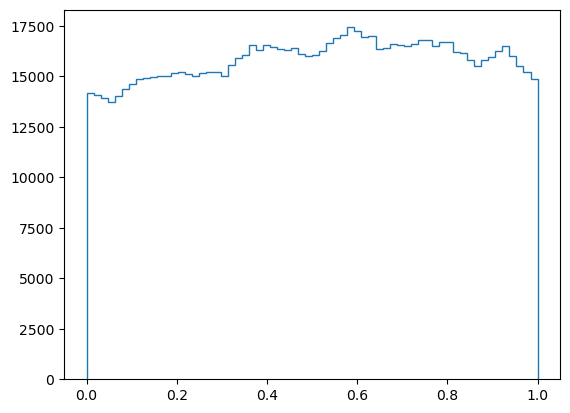

In [31]:
listed=plt.hist(phase,bins=64,histtype='step')
# plt.ylim(13000)

In [44]:
len(listed[1]),len(listed[0])

(65, 64)

In [45]:
listed[1]

array([1.84029341e-06, 1.56267875e-02, 3.12517347e-02, 4.68766819e-02,
       6.25016291e-02, 7.81265763e-02, 9.37515235e-02, 1.09376471e-01,
       1.25001418e-01, 1.40626365e-01, 1.56251312e-01, 1.71876260e-01,
       1.87501207e-01, 2.03126154e-01, 2.18751101e-01, 2.34376048e-01,
       2.50000996e-01, 2.65625943e-01, 2.81250890e-01, 2.96875837e-01,
       3.12500784e-01, 3.28125732e-01, 3.43750679e-01, 3.59375626e-01,
       3.75000573e-01, 3.90625520e-01, 4.06250468e-01, 4.21875415e-01,
       4.37500362e-01, 4.53125309e-01, 4.68750256e-01, 4.84375204e-01,
       5.00000151e-01, 5.15625098e-01, 5.31250045e-01, 5.46874992e-01,
       5.62499940e-01, 5.78124887e-01, 5.93749834e-01, 6.09374781e-01,
       6.24999729e-01, 6.40624676e-01, 6.56249623e-01, 6.71874570e-01,
       6.87499517e-01, 7.03124465e-01, 7.18749412e-01, 7.34374359e-01,
       7.49999306e-01, 7.65624253e-01, 7.81249201e-01, 7.96874148e-01,
       8.12499095e-01, 8.28124042e-01, 8.43748989e-01, 8.59373937e-01,
      

In [46]:
listed[0]

array([14176., 14061., 13921., 13737., 14039., 14378., 14618., 14845.,
       14935., 14972., 15013., 15026., 15180., 15212., 15093., 15006.,
       15186., 15190., 15213., 15033., 15560., 15913., 16048., 16533.,
       16292., 16561., 16456., 16349., 16309., 16418., 16118., 16025.,
       16041., 16246., 16624., 16882., 17046., 17427., 17259., 16966.,
       16998., 16360., 16387., 16622., 16566., 16487., 16622., 16774.,
       16793., 16476., 16712., 16720., 16194., 16159., 15816., 15491.,
       15801., 15952., 16258., 16501., 16015., 15509., 15205., 14871.])

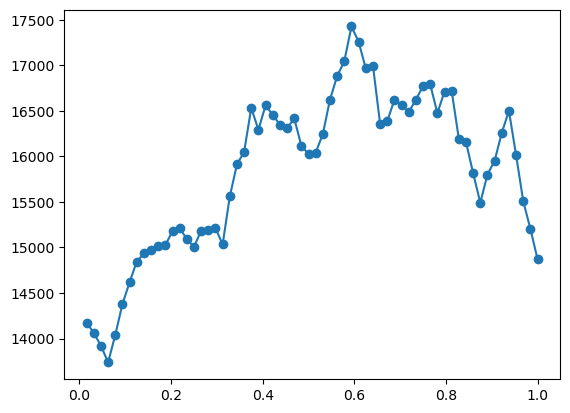

In [57]:
### Plot the profile as a line plot
plt.plot(listed[1][1:],listed[0],'-o')

In [61]:
folded_fits=fits.open("./folded_curves/6050390261/phase_resolved_flux_with_errors.fits")
folded_fits.info()

Filename: ./folded_curves/6050390261/phase_resolved_flux_with_errors.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     14   128R x 3C   [E, E, E]   


In [65]:
folded_fits[1].data

FITS_rec([(0.0078125, 538.26306, 4.3859906),
          (0.0234375, 541.4908 , 4.3893275),
          (0.0390625, 540.78406, 4.386991 ),
          (0.0546875, 550.97156, 4.44043  ),
          (0.0703125, 548.2606 , 4.417436 ),
          (0.0859375, 547.9472 , 4.4139085),
          (0.1015625, 541.12103, 4.3900824),
          (0.1171875, 533.9882 , 4.359559 ),
          (0.1328125, 534.3699 , 4.3596253),
          (0.1484375, 522.0649 , 4.3106127),
          (0.1640625, 533.2097 , 4.357126 ),
          (0.1796875, 531.0303 , 4.3467245),
          (0.1953125, 535.68585, 4.3649907),
          (0.2109375, 516.8663 , 4.2905655),
          (0.2265625, 502.7027 , 4.229923 ),
          (0.2421875, 488.07153, 4.165774 ),
          (0.2578125, 477.01144, 4.121828 ),
          (0.2734375, 474.90533, 4.111311 ),
          (0.2890625, 471.37936, 4.094619 ),
          (0.3046875, 479.85257, 4.13267  ),
          (0.3203125, 479.0556 , 4.129943 ),
          (0.3359375, 490.3015 , 4.191071 ),
          